In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 24,24

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("data.csv", sep=";")

In [3]:
pd.set_option('display.max_columns', 1000)

In [4]:
target = data['SaleCategory']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
data = data.drop(columns=['PoolQC', 'MiscFeature', 'Alley'])

In [7]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SaleCategory
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,1


In [8]:
# sns.heatmap(data.corr(), annot=True, fmt=".2f", 
#             linewidths=0.5);

In [9]:
# data.hist()

In [10]:
def get_aggregated_df(df, agg_type, col_to_groupby):
    agg_df = df[['Id', col_to_groupby, 'SaleCategory']].groupby(['Id', col_to_groupby]).agg([agg_type])
    agg_df = agg_df.unstack(fill_value=0)
    agg_df.columns = agg_df.columns.get_level_values(2)

    old_name = agg_df.columns.name
    old_cols = agg_df.columns
    new_cols = [old_name + '_' + agg_type + '_' + str(old_col) for old_col in old_cols]
    agg_df.rename(
        columns={old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}, inplace=True
    )
    return agg_df

In [11]:
columns = data.columns
columns[78:]

Index([], dtype='object')

In [12]:
dfs = []
for column in columns[1:77]:
    dfs.append(get_aggregated_df(data, agg_type='count', col_to_groupby=column))

In [13]:
data = data.set_index('Id')

In [14]:
for df in dfs:
    train_df = pd.merge(data, df, left_index=True, right_index=True, how='right')
    data = train_df

In [15]:
train_df = train_df.drop(train_df.columns[:78], axis=1)

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost
from sklearn.linear_model import LogisticRegression, Ridge, Lasso

In [17]:
clf = LogisticRegression()
X_train = train_df.fillna(0)
y_train = target

In [19]:
clf.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_train_predict = clf.predict_proba(X_train)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 9)
print("Train: ", round(roc_auc_train, 2))

Train:  0.77


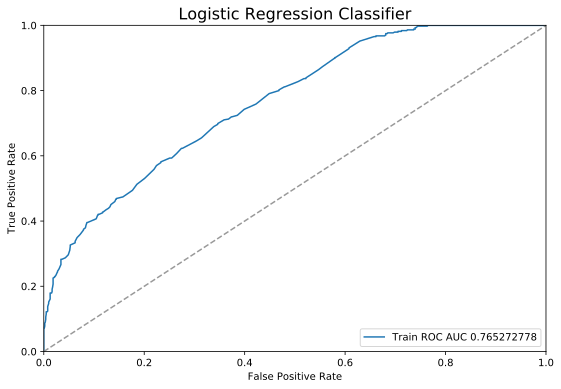

In [21]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

from pylab import rcParams
rcParams['figure.figsize'] = 9,6


plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [22]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
#xgb = DecisionTreeClassifier()
xgb.fit(X_train, y_train)
y_train_predict = xgb.predict_proba(X_train)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  0.78


In [23]:
X = X_train.as_matrix()
y = y_train
Columns = pd.io.parsers.ParserBase({'names':train_df.columns})._maybe_dedup_names(train_df.columns)
rg = Ridge(alpha=1000).fit(X, y)
coefs = np.array(rg.coef_)
columns_coefs = dict(zip(Columns, coefs))

k = 0
to_drop_columns = []
for coefs in columns_coefs.items():
    if abs(coefs[1]) < 1e-3:
        to_drop_columns.append(coefs[0])
        k+=1
        
train_df1 = train_df.drop(columns=to_drop_columns)
train_df1 = train_df1.fillna(0)

In [24]:
clf = LogisticRegression()
X_train1 = train_df1
y_train = target

In [25]:
clf.fit(X=X_train1, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_train_predict = clf.predict_proba(X_train1)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 9)
print("Train: ", round(roc_auc_train, 2))

Train:  0.76


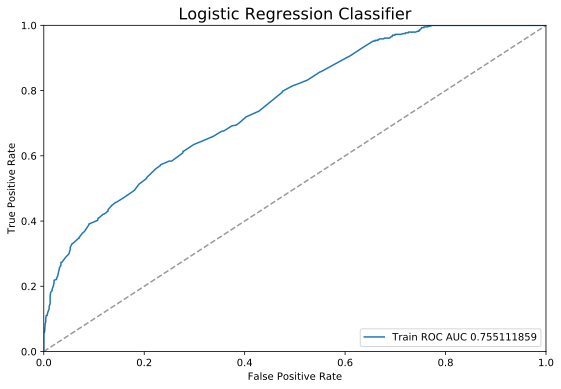

In [27]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [28]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
#xgb = DecisionTreeClassifier()
xgb.fit(X_train1, y_train)
y_train_predict = xgb.predict_proba(X_train1)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  0.77


Text(0,0.5,'explained_variance_ratio_')

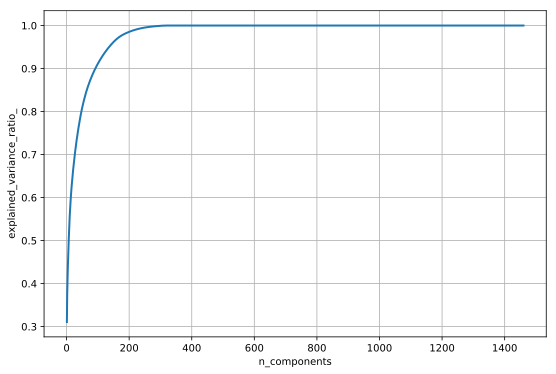

In [29]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [30]:
data = pd.read_csv("data.csv", sep=";")

In [31]:
new_adv_df = pd.DataFrame(PCA(n_components=100).fit_transform(X), columns=['f'+str(i) for i in range(0,100)])
new_adv_df["SaleCategory"] = data['SaleCategory']
new_adv_df.head(5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,SaleCategory
0,-0.675317,-0.168818,-0.401467,-0.000672,-0.460570,0.676674,-0.181083,0.107567,0.001942,-0.046685,-0.045203,-0.121909,-0.097950,-0.005792,-0.083568,0.091856,-0.043882,0.009191,0.007804,0.007954,0.076246,-0.040777,-0.026096,0.078931,-0.122309,0.214554,-0.022694,0.151044,-0.023912,0.082837,-0.074664,0.133563,0.131230,-0.082074,0.061518,0.078248,-0.148257,-0.214241,-0.097490,0.077614,0.266470,0.382210,0.246784,0.242139,-0.194764,0.009363,-0.059567,0.083783,0.147374,-0.175592,-0.033690,-0.243226,0.166889,0.218554,-0.063429,0.032565,0.011551,0.245851,-0.007319,-0.012845,-0.039270,-0.074614,0.015435,0.118668,-0.062627,0.006113,-0.087136,0.042336,0.013434,-0.033993,0.067369,0.087594,0.005385,-0.011410,0.003505,-0.021620,0.001170,0.068911,-0.014442,-0.027123,0.056175,0.036800,0.080367,-0.046975,-0.021622,-0.007220,-0.047710,0.049263,0.044714,0.014536,0.007761,0.020243,0.002187,-0.029673,-0.047633,-0.000728,0.030741,0.021357,-0.029659,-0.054971,1
1,-0.666926,-0.186350,-0.262252,0.799410,0.099063,-0.194701,0.354416,0.041827,-0.520107,0.164156,-0.489831,0.333807,0.123632,-0.220807,0.010087,-0.120670,-0.110363,-0.046267,-0.138633,-0.029634,-0.014248,-0.003671,0.095716,-0.057074,0.062202,0.004865,-0.040326,-0.051413,-0.012808,-0.011970,0.004290,-0.021051,0.007171,0.010722,-0.048747,0.027213,0.001822,-0.014303,0.001518,0.046925,0.010905,0.035172,-0.015318,0.002465,0.010961,0.009763,0.006885,0.013979,-0.014873,-0.003133,-0.019245,-0.003582,-0.001187,-0.002821,-0.001887,0.014294,0.026397,-0.009687,-0.011363,0.008219,-0.013631,-0.035175,-0.003436,-0.010855,-0.007226,-0.006996,0.028503,0.003240,-0.005048,-0.010550,0.015018,-0.018709,-0.010503,0.000726,-0.020506,-0.007186,0.002053,-0.006782,0.023582,-0.015658,0.006178,0.005136,-0.008436,-0.008580,-0.017237,0.002282,0.014338,-0.005994,-0.000666,-0.004013,-0.006679,-0.001245,-0.002149,0.007952,0.003800,-0.003191,0.013025,0.008950,-0.004185,0.000771,0
2,-0.682263,-0.175849,-0.364347,-0.019424,-0.442867,0.699829,-0.183447,0.135214,0.043219,-0.041468,-0.152772,-0.134101,-0.147305,-0.007672,-0.050361,0.006234,-0.101388,0.005764,0.090977,-0.013756,0.014656,0.057028,-0.062656,0.024031,-0.154030,0.132913,-0.039863,0.091593,-0.061287,-0.030587,0.017727,0.156251,0.418899,0.232882,0.284587,-0.349741,0.190204,0.028049,-0.367947,0.171144,-0.261453,0.138467,-0.172749,0.038798,0.098962,0.064058,0.005391,0.027098,-0.127623,0.021775,-0.033621,0.106706,-0.056435,0.019576,-0.003974,0.004644,-0.074979,-0.013265,0.052208,-0.066015,-0.037319,0.057847,-0.008556,-0.026696,0.025905,-0.037667,0.006760,0.017883,-0.007646,0.029789,0.015659,-0.014980,-0.021815,0.029824,-0.014608,0.027333,0.025057,-0.023579,0.002877,-0.053543,-0.020386,-0.024478,0.006638,0.013184,-0.048687,0.016175,0.001734,0.027793,-0.001402,-0.008122,0.011529,-0.014762,0.032108,-0.010845,0.035174,0.002917,-0.022634,0.008320,0.000923,-0.013573,1
3,-0.684178,-0.246467,0.597552,-0.379102,-0.471816,-0.529299,-0.211540,-0.082257,-0.083828,-0.025289,-0.130747,-0.543196,0.863608,0.111159,0.023275,0.085839,-0.115374,0.067355,-0.095028,-0.001820,0.124820,-0.237227,-0.026860,0.021234,-0.182309,0.244893,-0.202376,0.186114,-0.074511,0.038803,-0.051914,0.142384,0.107298,-0.063752,0.058079,0.116943,-0.101797,-0.254118,-0.126999,0.035896,0.217896,0.427973,0.308506,0.180279,-0.173503,-0.016439,-0.017888,0.072657,0.121582,-0.235061,-0.045450,-0.191729,0.173353,0.180964,-0.074942,0.088612,-0.006670,0.261624,0.002741,0.019775,-0.005197,-0.104676,0.043342,0.126256,-0.008921,-0.057263,-0.045349,-0.024678,-0.006933,-0.029941,0.080822,0.053758,-0.026930,0.045886,0.052314,-0.060144,0

In [32]:
clf = LogisticRegression()
X_train2 = new_adv_df.drop(columns=['SaleCategory']).as_matrix()
y_train = target

In [33]:
clf.fit(X=X_train2, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_train_predict = clf.predict_proba(X_train2)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 9)
print("Train: ", round(roc_auc_train, 2))

Train:  0.76


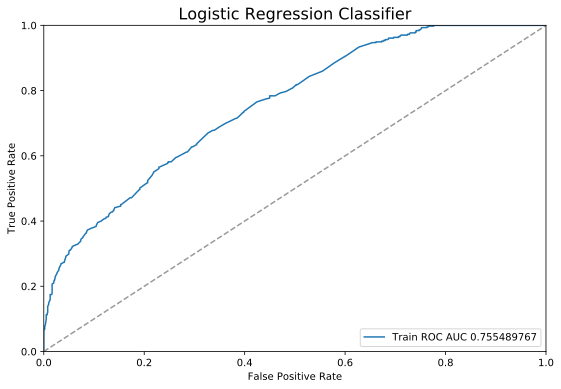

In [35]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [36]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
#xgb = DecisionTreeClassifier()
xgb.fit(X_train2, y_train)
y_train_predict = xgb.predict_proba(X_train2)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  0.83


In [37]:
X_train2.shape

(1460, 100)